# Problem statement: EastWestAirlines

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [24]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Load dataset
EWA = pd.read_excel(r'C:\Users\BIS\Desktop\DATA SCIENCE ASSIGNMENTS\Clustering\EastWestAirlines.xlsx',sheet_name='data')
EWA

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [26]:
EWA.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [27]:
EWA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# Hierarchical Clustering

In [28]:
from sklearn.preprocessing import MinMaxScaler
mmsc1=MinMaxScaler()
EWA1=pd.DataFrame(mmsc1.fit_transform(EWA.iloc[:,1:]))
EWA1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [30]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

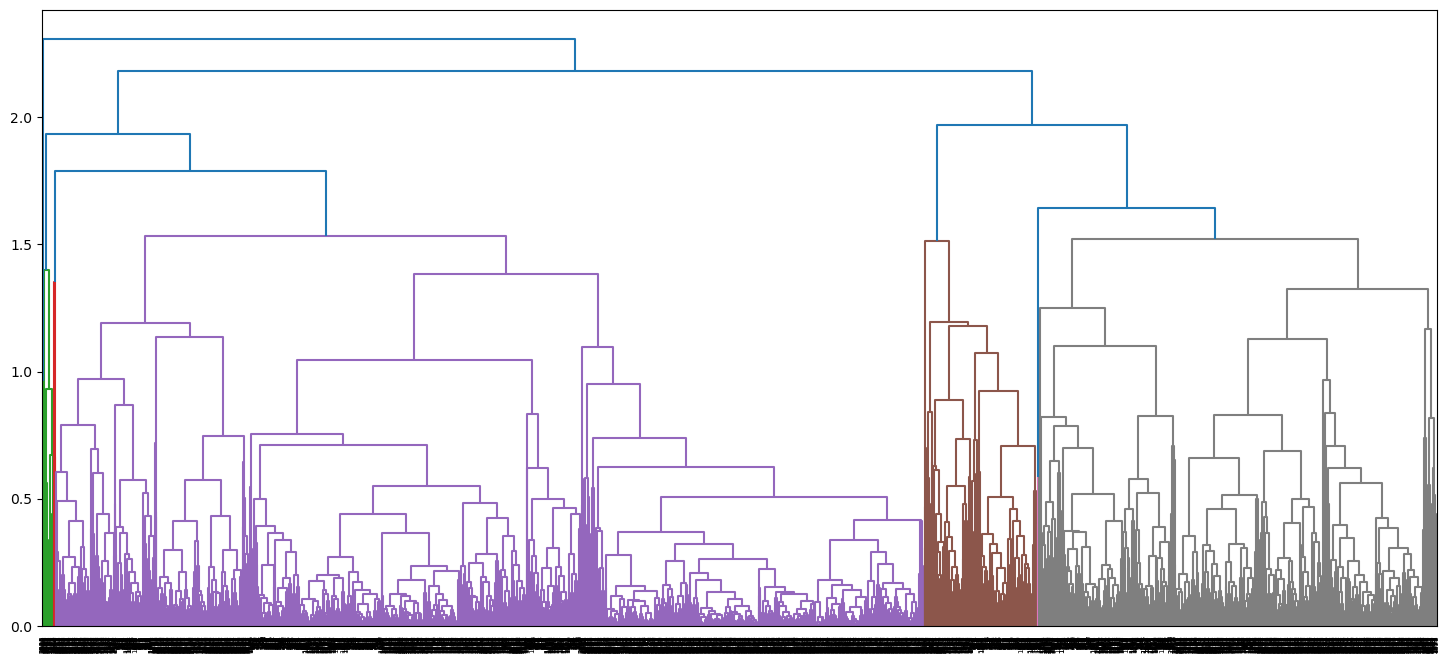

In [34]:
L=linkage(EWA1,method='complete', metric='euclidean')
plt.figure(figsize=(18,8))
sch.dendrogram(L)
plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering()

In [40]:
h_clust=AgglomerativeClustering(n_clusters=10,linkage='complete',affinity='euclidean').fit(EWA1)
cls_labels=pd.Series(h_clust.labels_)
EWA['cluster']=cls_labels
EWA

C:\Users\BIS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [42]:
EWA.iloc[:,1:].groupby(EWA.cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
cluster,,,,,,,,,,,,
0,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548,0.0
1,64338.573333,219.888000,2.313333,1.008000,1.001333,19187.393333,13.530667,660.120000,1.982667,3256.822667,1.000000,1.0
2,45074.547804,90.659432,1.187080,1.000000,1.000517,3895.703876,6.797933,230.889406,0.674935,3844.252713,0.000000,2.0
3,109881.125641,215.915385,1.684615,1.012821,1.000000,12276.261538,13.128205,895.956410,2.733333,6302.107692,1.000000,3.0
4,158471.564263,212.598746,4.661442,1.000000,1.000000,69417.231975,23.059561,1030.771160,3.235110,5789.893417,1.000000,4.0
5,64521.000000,295.500000,1.250000,1.000000,4.250000,73273.750000,15.750000,575.000000,2.250000,4242.750000,0.500000,5.0
6,152861.250000,8804.750000,4.000000,1.000000,1.000000,33927.500000,19.000000,500.000000,1.500000,5944.000000,1.000000,6.0
7,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,7.0
8,111769.618705,81.217626,3.543165,1.001799,1.025180,32007.528777,17.089928,214.537770,0.579137,3756.753597,0.000000,8.0


# KMeans Clustering

In [45]:
from sklearn.cluster import KMeans

In [46]:
EWA2=pd.DataFrame(mmsc1.fit_transform(EWA.iloc[:,1:]))
EWA2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.222222
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.222222
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.222222
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.222222
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.444444


C:\Users\BIS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BIS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BIS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BIS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BIS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans

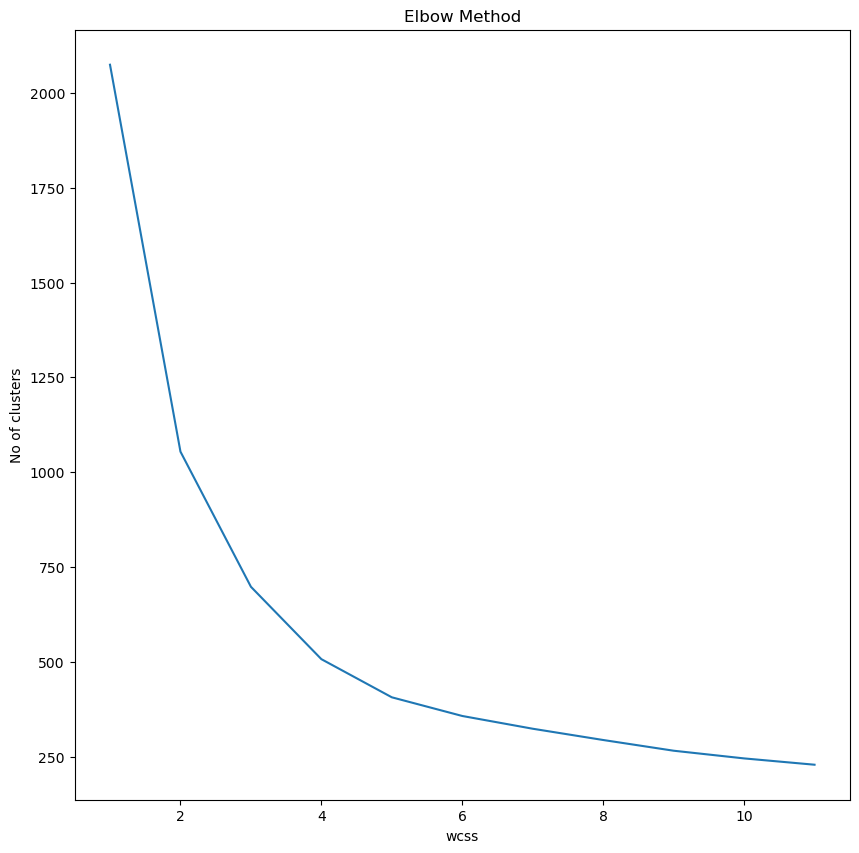

In [47]:
plt.figure(figsize=(10,10))
wcss=[]
for i in range(1,12):
    clf=KMeans(n_clusters=i)
    clf.fit(EWA2)
    wcss.append(clf.inertia_)
plt.plot(range(1,12),wcss)
plt.title('Elbow Method')
plt.xlabel('wcss')
plt.ylabel('No of clusters')
plt.show()

In [48]:
EWA3=EWA.drop(['cluster'],axis=1)

In [55]:
clf=KMeans(n_clusters=5)
y_KMeans=clf.fit_predict(EWA3)
clf.labels_

C:\Users\BIS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 3, 0, 0])

In [56]:
y_KMeans

array([0, 0, 0, ..., 3, 0, 0])

In [57]:
d2=pd.DataFrame(y_KMeans)
EWA3['KM_Cluster']=d2
EWA3=EWA3.iloc[:,1:]
EWA3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KM_Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [59]:
EWA3.groupby(EWA3.KM_Cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
KM_Cluster,,,,,,,,,,,
0,26238.643885,99.662670,1.558753,1.016787,1.004396,8686.295763,8.739808,257.964828,0.799361,3736.113909,0.316147
1,208322.871345,308.014620,3.014620,1.005848,1.014620,35545.608187,18.286550,1053.485380,2.944444,5041.675439,0.494152
2,922162.526316,564.736842,3.210526,1.000000,1.157895,58492.052632,20.894737,1607.526316,6.263158,6642.315789,0.894737
3,98242.422710,163.444656,2.821565,1.010496,1.028626,27840.389313,15.383588,632.483779,1.835878,4531.229008,0.420802
4,419966.511364,449.965909,3.261364,1.034091,1.000000,49823.329545,19.954545,1598.375000,5.034091,5945.193182,0.715909


Text(0.5, 1.0, 'Clusters using KMeans')

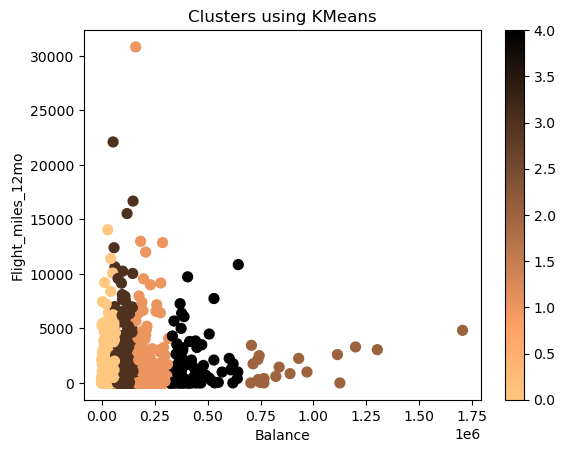

In [61]:
EWA3.plot(x="Balance",y="Flight_miles_12mo",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.copper_r)
plt.title('Clusters using KMeans')

In [63]:
import sklearn
from sklearn.metrics import silhouette_score
sklearn.metrics.silhouette_score(EWA3,y_KMeans)

0.5422770543235359

# DBSCAN Clustering

In [64]:
from sklearn.preprocessing import StandardScaler

In [66]:
EWA4=EWA.iloc[:,1:12]
EWA4.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [67]:
array=EWA4.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [68]:
stsc1=StandardScaler().fit(array)
x=stsc1.transform(array)

In [69]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [70]:
from sklearn.cluster import DBSCAN

In [71]:
dbscan=DBSCAN(eps=4,min_samples=12)
dbscan.fit(x)

DBSCAN(eps=4, min_samples=12)

In [73]:
d5=dbscan.labels_
d6=pd.DataFrame(d5)

In [76]:
sklearn.metrics.silhouette_score(x,d5)

0.5408530656963311

Text(0.5, 1.0, 'Clusters using DBSCAN')

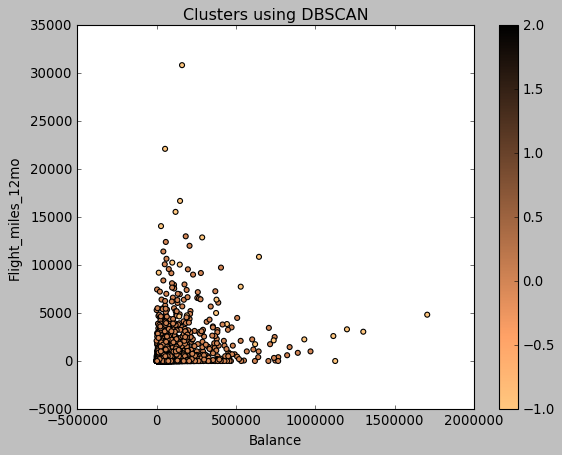

In [77]:
plt.style.use('classic')
EWA4.plot(x="Balance",y ="Flight_miles_12mo",c=dbscan.labels_ ,kind="scatter",s=20,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBSCAN')

In [78]:
EWA4['DB_Cluster']=d6
EWA4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DB_Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [79]:
EWA4.groupby(EWA4.DB_Cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
DB_Cluster,,,,,,,,,,,
-1,334641.604651,998.813953,3.186047,1.093023,2.139535,74098.953488,32.325581,4957.000000,12.046512,4958.093023,0.767442
0,70975.630746,136.201481,2.056946,1.000000,1.000000,16545.903473,11.331205,412.425689,1.258938,4111.305924,0.366190
1,45781.714286,0.000000,1.000000,3.000000,1.000000,20147.571429,16.928571,410.000000,1.714286,4137.642857,0.357143
2,52331.000000,0.000000,1.153846,2.000000,1.000000,11544.653846,15.230769,223.576923,0.807692,3812.307692,0.346154


In [80]:
#Cluster 0 have more no. of award flights compare to others and cluster 0 also had earned more number of flights using freq flyier credit cards